In [25]:
from pandas import Series, DataFrame
import pandas as pd
import numpy as np
import glob

# Number of flights taking off from Boston
data=pd.read_csv("../Data/Jan_2016.csv")[["ORIGIN_CITY_NAME", "AIRLINE_ID", "DEST_CITY_NAME", "WEATHER_DELAY", "FL_DATE"]]
airdata = pd.read_csv("../Data/Airline_LOV.csv")[["AIRLINE_ID", "CARRIER_NAME"]]
df = DataFrame(data[data.apply(lambda x: x['ORIGIN_CITY_NAME'] == "Boston, MA", axis=1)])

data.to_csv('newdata.csv', sep=',', encoding='utf-8')


In [26]:
df1 = airdata.drop_duplicates()



In [27]:
import datetime
weatherdata = pd.read_csv("../Data/Weather data.csv")[["CLDATE", "SNWD", "SNOW"]]

# df = DataFrame(weatherdata[weatherdata.apply(lambda x: x['CLDATE'] == "", axis=1)])
weatherdata.head()

,CLDATE,SNWD,SNOW
0,1/1/16,0.0,0.0
1,1/2/16,0.0,0.0
2,1/3/16,0.0,0.0
3,1/4/16,0.0,0.0
4,1/5/16,0.0,0.0


In [28]:
weatherdata['CLDATE']=pd.to_datetime(weatherdata['CLDATE']).dt.date
df['FL_DATE']=pd.to_datetime(df['FL_DATE']).dt.date


In [29]:
weatherdata.head()

,CLDATE,SNWD,SNOW
0,2016-01-01,0.0,0.0
1,2016-01-02,0.0,0.0
2,2016-01-03,0.0,0.0
3,2016-01-04,0.0,0.0
4,2016-01-05,0.0,0.0


In [30]:
result=pd.merge(weatherdata, df, how = 'outer', left_on = 'CLDATE', right_on = 'FL_DATE')
result.to_csv("weather.csv")

In [32]:
result=result.fillna(0)
result.head()

,CLDATE,SNWD,SNOW,ORIGIN_CITY_NAME,AIRLINE_ID,DEST_CITY_NAME,WEATHER_DELAY,FL_DATE
0,2016-01-01,0.0,0.0,"Boston, MA",20416.0,"Fort Myers, FL",0.0,2016-01-01
1,2016-01-01,0.0,0.0,"Boston, MA",20416.0,"Myrtle Beach, SC",0.0,2016-01-01
2,2016-01-01,0.0,0.0,"Boston, MA",20416.0,"Atlanta, GA",0.0,2016-01-01
3,2016-01-01,0.0,0.0,"Boston, MA",20416.0,"Fort Lauderdale, FL",0.0,2016-01-01
4,2016-01-01,0.0,0.0,"Boston, MA",20416.0,"Las Vegas, NV",0.0,2016-01-01


In [48]:
#Step 6 - Using Numpy Bins to Segregate Snow data
import numpy as np
import csv
snowbins = [-1.0,0.0, 10.0, 20.0, 30.0]
snowData=DataFrame(result,columns=['SNOW','WEATHER_DELAY'])
snow_group_names = ['-1.0 - 0.0','0.0 - 10', '10 - 20', '20 - 30']
snowData['conditions'] = pd.cut(snowData['SNOW'], snowbins, labels=snow_group_names)
sp=snowData[['WEATHER_DELAY','conditions']].groupby(['conditions']).sum()
sp=sp.reset_index()
sp.to_csv("snow.csv")

In [49]:
#Step 6 - Using Numpy Bins to Segregate SnowWind data
import numpy as np
wnbins = [-1.0,0.0, 10.0, 20.0, 30.0]
wndData=DataFrame(result,columns=['SNWD','WEATHER_DELAY'])
wnd_group_names = ['-1.0 - 0.0','0.0 - 10', '10 - 20', '20 - 30']
wndData['conditions'] = pd.cut(wndData['SNWD'], wnbins, labels=wnd_group_names)
wn=wndData[['WEATHER_DELAY','conditions']].groupby(['conditions']).sum()
wn=wn.reset_index()
wn.to_csv("snwd.csv")

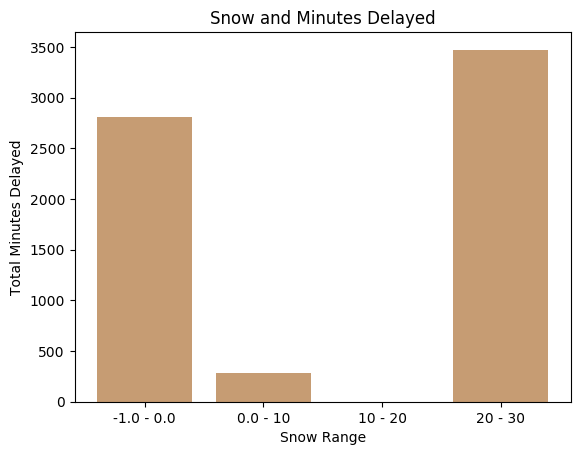

In [51]:
#Plot of compare Climatic data Precipitation with Rides

import matplotlib.pyplot as plt; plt.rcdefaults()
import numpy as np
import matplotlib.pyplot as plt
sf=pd.read_csv("snow.csv",sep=",")
objects = sf['conditions'].tolist()
y_pos = np.arange(len(objects))
performance = sf['WEATHER_DELAY'].tolist()
 
plt.bar(y_pos, performance, align='center', alpha=0.5)
plt.xticks(y_pos, objects)
plt.ylabel('Total Minutes Delayed')
plt.xlabel("Snow Range")
plt.title("Snow and Minutes Delayed")
fig1 = plt.gcf()
fig1.savefig("snow_minutes.png")
plt.show()

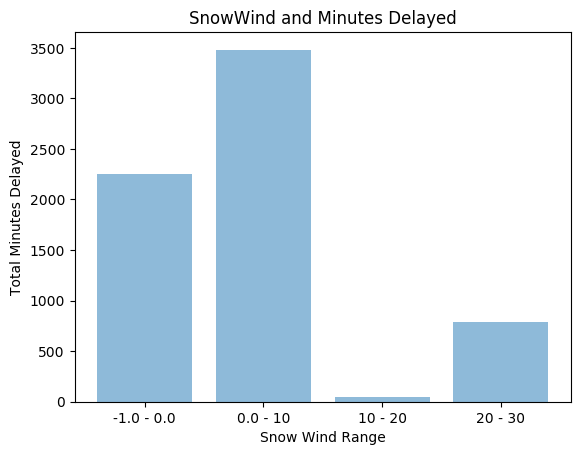

In [52]:
#Plot of compare Climatic data Precipitation with Rides

import matplotlib.pyplot as plt; plt.rcdefaults()
import numpy as np
import matplotlib.pyplot as plt
sn=pd.read_csv("snwd.csv",sep=",")
objects = sn['conditions'].tolist()
y_pos = np.arange(len(objects))
performance = sn['WEATHER_DELAY'].tolist()
 
plt.bar(y_pos, performance, align='center', alpha=0.5)
plt.xticks(y_pos, objects)
plt.ylabel('Total Minutes Delayed')
plt.xlabel("Snow Wind Range")
plt.title("SnowWind and Minutes Delayed")
fig1 = plt.gcf()
fig1.savefig("snow_wnd.png")
plt.show()